# Solar power in a nuclear winter

In [41]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM, waccm, waccmdaily

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


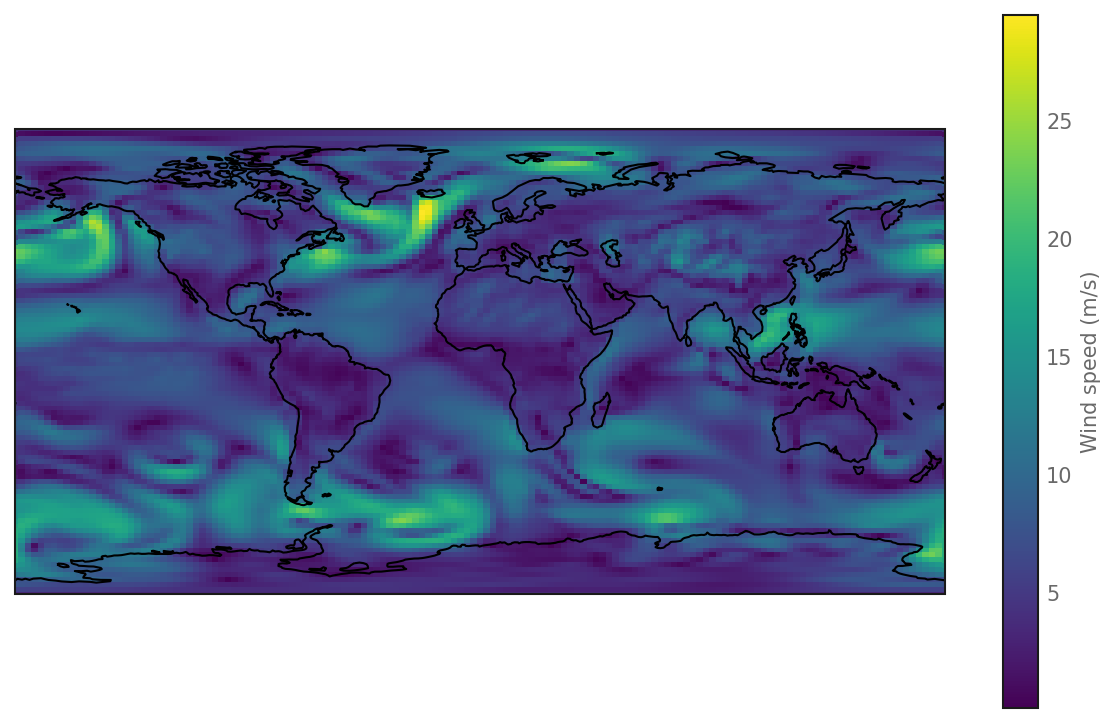

In [105]:
waccmdaily.plot_map("windspeed", "05-01-01T19:30:00")

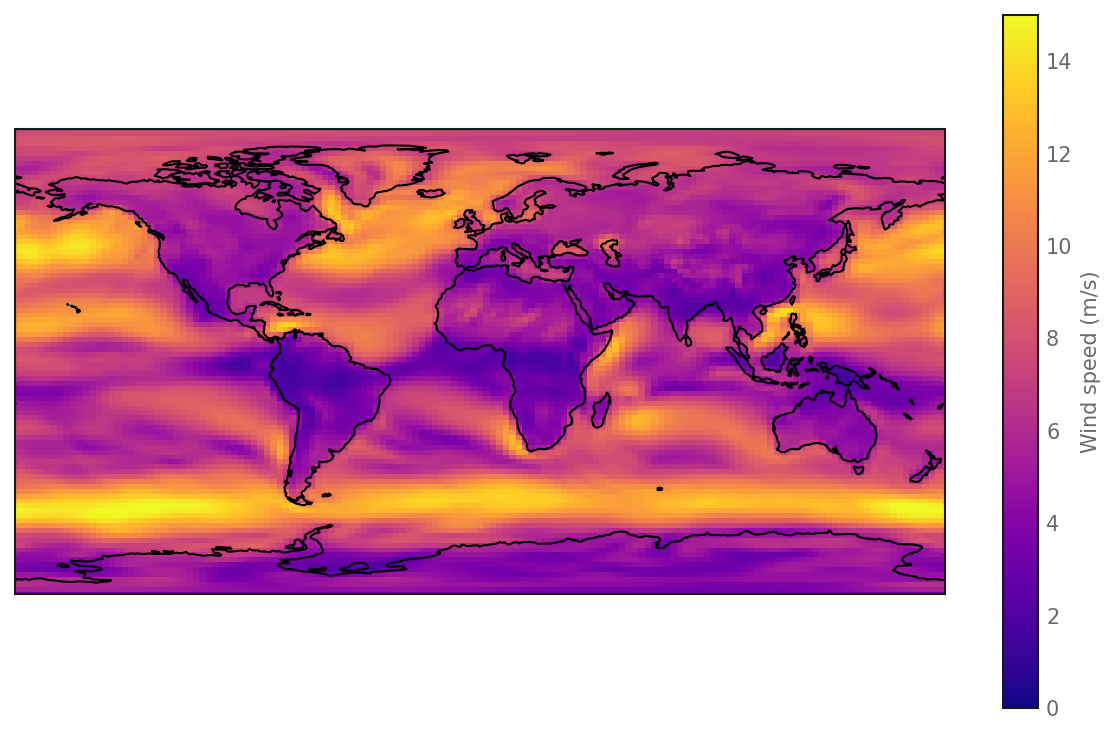

In [114]:
waccmdaily.plot_map("windspeed", "05-01", zmin=0, zmax=15)

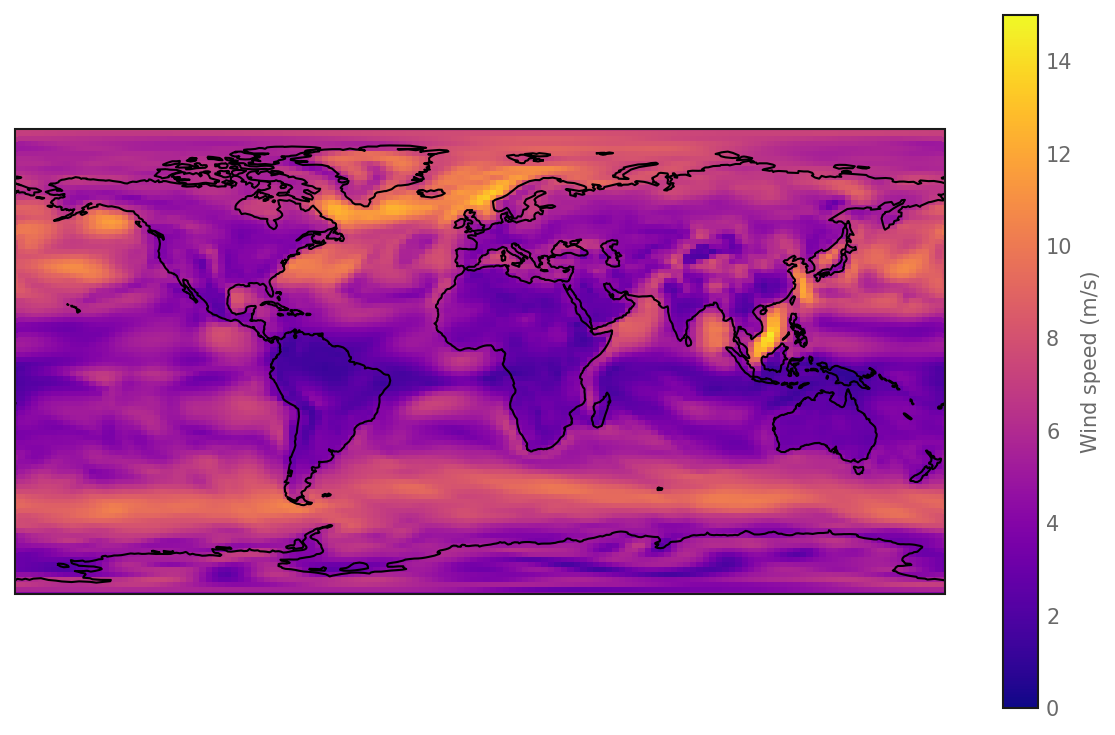

In [115]:
waccmdaily.plot_map("windspeed", "06-01", zmin=0, zmax=15)

In [118]:
waccmdaily.plot_map("windspeed", "02-01", zmin=0, zmax=15)

Variable 'windspeed' not found in the dataset.
